In [1]:
from GPA1D import GPA1D
from GPA import GPA
import numpy as np
import chi
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
import seaborn as sns 

In [2]:
ga = GPA1D(splitWidth=16,spaceFilling='hilbert')

In [3]:
ga2 = GPA()

In [4]:
a = np.arange(16).reshape(4,4).astype(float)
ga2(a,moment=['G2','G3'])

{'G2': 0.4999999999999999, 'G3': 0.8200314258455798}

# P-Model

In [5]:
series, _, _ = chi.generateUniformEndo(4096)
res = ga(series)

0.45485225892923836


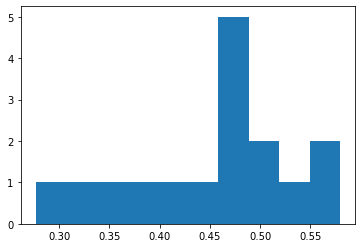

In [6]:
plt.figure()
plt.hist(res['G2'])
print(np.average(res['G2']))
plt.show()

In [7]:
series, _, _ = chi.generateUniformExo(4096)
res = ga(series)

0.20306505469980507


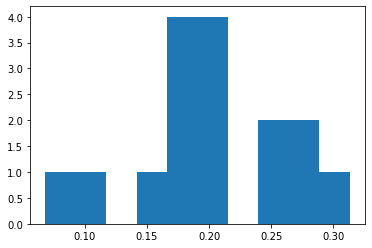

In [8]:
plt.figure()
plt.hist(res['G2'])
print(np.average(res['G2']))
plt.show()

pts

# Testing scales

In [39]:
series, _, _ = chi.generateUniformEndo(4096)
pts = []
for sw in range(3,17,2):
    ga = GPA1D(splitWidth=sw,spaceFilling='hilbert')
    res = ga(series)
    res['scale'] = sw
    pts.append(res)

pts = pd.concat(pts, ignore_index=True)
pts

,G1,G2,G3,G4,scale
0,0.164269,0.772861,0.782154,1.265016+1.228426j,3
1,0.194809,0.562581,0.768470,-0.910275+0.528526j,3
2,0.174149,0.782908,0.817236,1.406742-0.207050j,3
3,0.188108,0.693982,0.764478,1.096918+1.588107j,3
4,0.165127,0.799263,0.805278,1.021115-0.959092j,3
...,...,...,...,...,...
821,0.144970,0.365599,0.436620,0.740215+0.509443j,15
822,0.119751,0.392142,0.425188,0.519667-0.163718j,15
823,0.113565,0.456277,0.519260,0.679329-0.372692j,15
824,0.133769,0.448837,0.521504,0.912085-0.614945j,15


In [40]:
series, _, _ = chi.generateUniformExo(4096)
pts = []
for sw in range(3,17,2):
    ga = GPA1D(splitWidth=sw,spaceFilling='hilbert')
    res = ga(series)
    res['scale'] = sw
    pts.append(res)

pts = pd.concat(pts, ignore_index=True)
pts1 = pts.groupby('scale',as_index=False).mean()
pts1

,scale,G1,G2,G3,G4
0,3,0.236306,0.721992,0.725911,0.943338+0.244636j
1,5,0.239445,0.695161,0.654869,0.965219+0.109721j
2,7,0.256518,0.547638,0.564859,0.821206+0.126819j
3,9,0.253598,0.423143,0.487332,0.922023+0.062776j
4,11,0.254915,0.344112,0.436330,0.838062+0.095352j
5,13,0.246926,0.274594,0.405623,0.977955+0.161951j
6,15,0.260254,0.234110,0.385130,1.017976+0.122542j


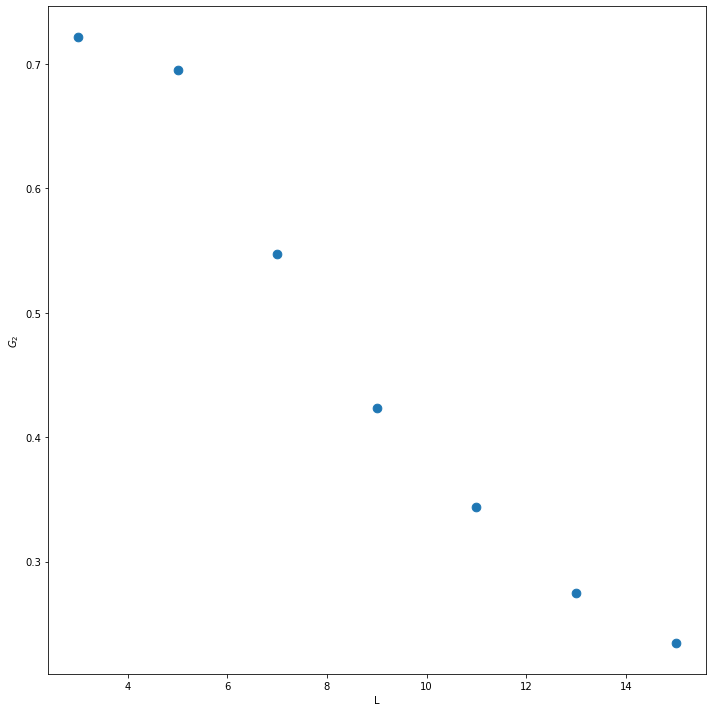

In [41]:
plt.figure(figsize=(10,10))
plt.scatter(pts1['scale'], pts1['G2'], marker ='.',s=300)
plt.xlabel("L")
plt.ylabel(r"$G_2$")
plt.tight_layout()
plt.show()


In [42]:
series, _, _ = chi.generateUniformEndo(4096)
pts = []
for sw in range(3,17,2):
    ga = GPA1D(splitWidth=sw,spaceFilling='hilbert')
    res = ga(series)
    res['scale'] = sw
    pts.append(res)

pts = pd.concat(pts, ignore_index=True)
pts2 = pts.groupby('scale',as_index=False).mean()
pts

,G1,G2,G3,G4,scale
0,0.159870,0.797003,0.776609,1.375122+0.599811j,3
1,0.180031,0.714705,0.703596,0.921940+0.921117j,3
2,0.193422,0.784155,0.732612,0.377406-0.223988j,3
3,0.262631,0.724878,0.404029,0.225019-0.765162j,3
4,0.189492,0.898768,0.858590,0.457717+1.076273j,3
...,...,...,...,...,...
821,0.125619,0.383898,0.472487,1.359035+0.541010j,15
822,0.133041,0.500882,0.531685,1.530536+0.382644j,15
823,0.116472,0.513915,0.510251,1.250749+0.602048j,15
824,0.123550,0.461410,0.523472,1.229436+0.028867j,15


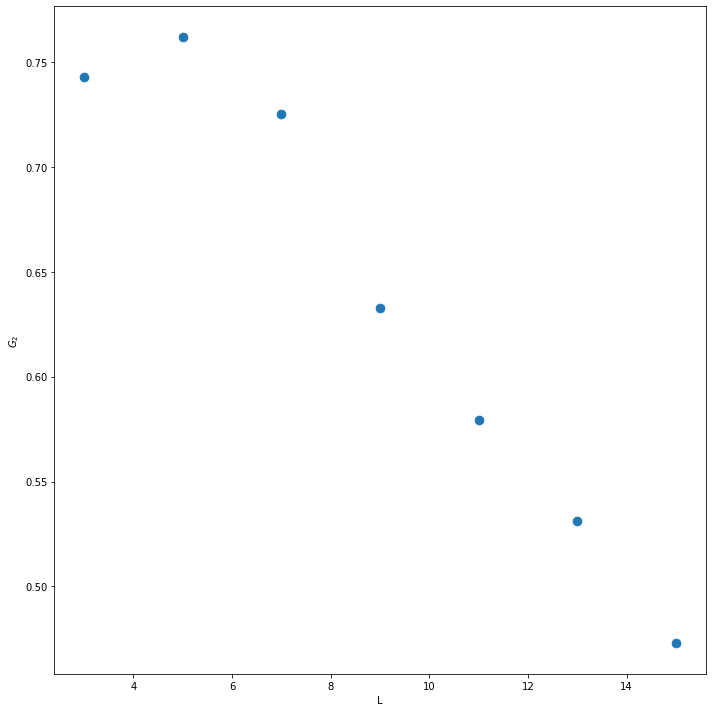

In [43]:
plt.figure(figsize=(10,10))
plt.scatter(pts2['scale'], pts2['G2'], marker ='.',s=300)
plt.xlabel("L")
plt.ylabel(r"$G_2$")
plt.tight_layout()
plt.show()


In [22]:
plt.figure(figsize=(10,10))
plt.scatter(pts1['scale'], pts1['G2'], marker ='.',s=300)
plt.scatter(pts2['scale'], pts2['G2'], marker ='.',s=300)
fit = np.polyfit(np.log(pts1['scale']), np.log(pts1['G2']),1)
print(fit)

y2 = np.polyval(fit, np.log(pts1['scale']))
print(np.exp(y2))
plt.plot( pts2['scale'], np.exp(y2), color='red')

fit = np.polyfit(np.log(pts2['scale']), np.log(pts2['G2']),1)
print(fit)

y2 = np.polyval(fit, np.log(pts2['scale']))
print(np.exp(y2))
plt.plot( pts2['scale'], np.exp(y2), color='red')

plt.xlabel("L",fontsize=20)
plt.ylabel(r"$G_2$",fontsize=20)
plt.tight_layout()
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()


NameError: name 'pts1' is not defined

<Figure size 720x720 with 0 Axes>

100%|█████████████████████████████████████████| 100/100 [08:05<00:00,  4.86s/it]


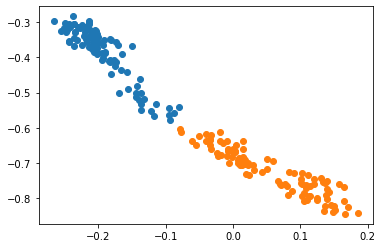

In [42]:
endo,exo = [] , []
for i in tqdm.tqdm(range(100)):
    series, _, _ = chi.generateUniformEndo(4096)
    g1 = GPA1D.scalingLaw(series,"G1")
    g2 = GPA1D.scalingLaw(series,"G2")
    g3 = GPA1D.scalingLaw(series,"G3")
    endo.append({"G1":g1,"G2":g2,"G3":g3})
    
    series, _, _ = chi.generateUniformExo(4096)
    g1 = GPA1D.scalingLaw(series,"G1")
    g2 = GPA1D.scalingLaw(series,"G2")
    g3 = GPA1D.scalingLaw(series,"G3")
    exo.append({"G1":g1,"G2":g2,"G3":g3})

endo,exo = pd.DataFrame(endo),pd.DataFrame(exo)
plt.figure()
plt.scatter(endo["G1"],endo["G2"])
plt.scatter(exo["G1"],exo["G2"])
plt.show()

100%|█████████████████████████████████████████| 100/100 [02:09<00:00,  1.30s/it]


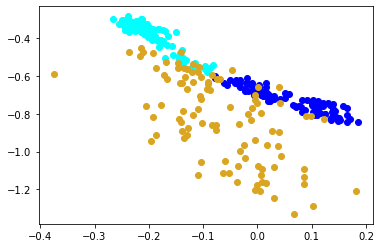

In [43]:
lor = []
for i in tqdm.tqdm(range(100)):
    mu = 2 + 4*np.random.rand()
    t, r= chi.lorenzSynch(mu=mu, n=2**10+100)
    g1 = GPA1D.scalingLaw(r,"G1")
    g2 = GPA1D.scalingLaw(r,"G2")
    g3 = GPA1D.scalingLaw(r,"G3")
    lor.append({"G1":g1,"G2":g2,"G3":g3})
lor = pd.DataFrame(lor)
plt.figure()
plt.scatter(endo["G1"],endo["G2"],color='cyan')
plt.scatter(exo["G1"],exo["G2"],color='blue')
plt.scatter(lor["G1"],lor["G2"],color='goldenrod')
plt.show()

100%|█████████████████████████████████████████| 100/100 [20:24<00:00, 12.24s/it]


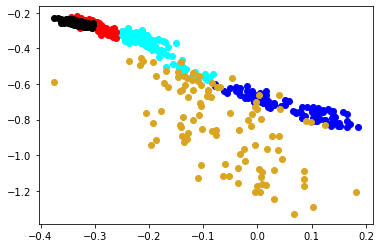

In [44]:
rn,wn = [],[]
for i in tqdm.tqdm(range(100)):
    r = chi.cNoise(2,[2**13])
    g1 = GPA1D.scalingLaw(r,"G1")
    g2 = GPA1D.scalingLaw(r,"G2")
    g3 = GPA1D.scalingLaw(r,"G3")
    rn.append({"G1":g1,"G2":g2,"G3":g3})
    
    w = chi.cNoise(0,[2**13])
    g1 = GPA1D.scalingLaw(w,"G1")
    g2 = GPA1D.scalingLaw(w,"G2")
    g3 = GPA1D.scalingLaw(w,"G3")
    wn.append({"G1":g1,"G2":g2,"G3":g3})

rn = pd.DataFrame(rn)
wn = pd.DataFrame(wn)

plt.figure()
plt.scatter(endo["G1"],endo["G2"],color='cyan')
plt.scatter(exo["G1"],exo["G2"],color='blue')
plt.scatter(lor["G1"],lor["G2"],color='goldenrod')
plt.scatter(rn["G1"],rn["G2"],color='red')
plt.scatter(wn["G1"],wn["G2"],color='black')
plt.show()

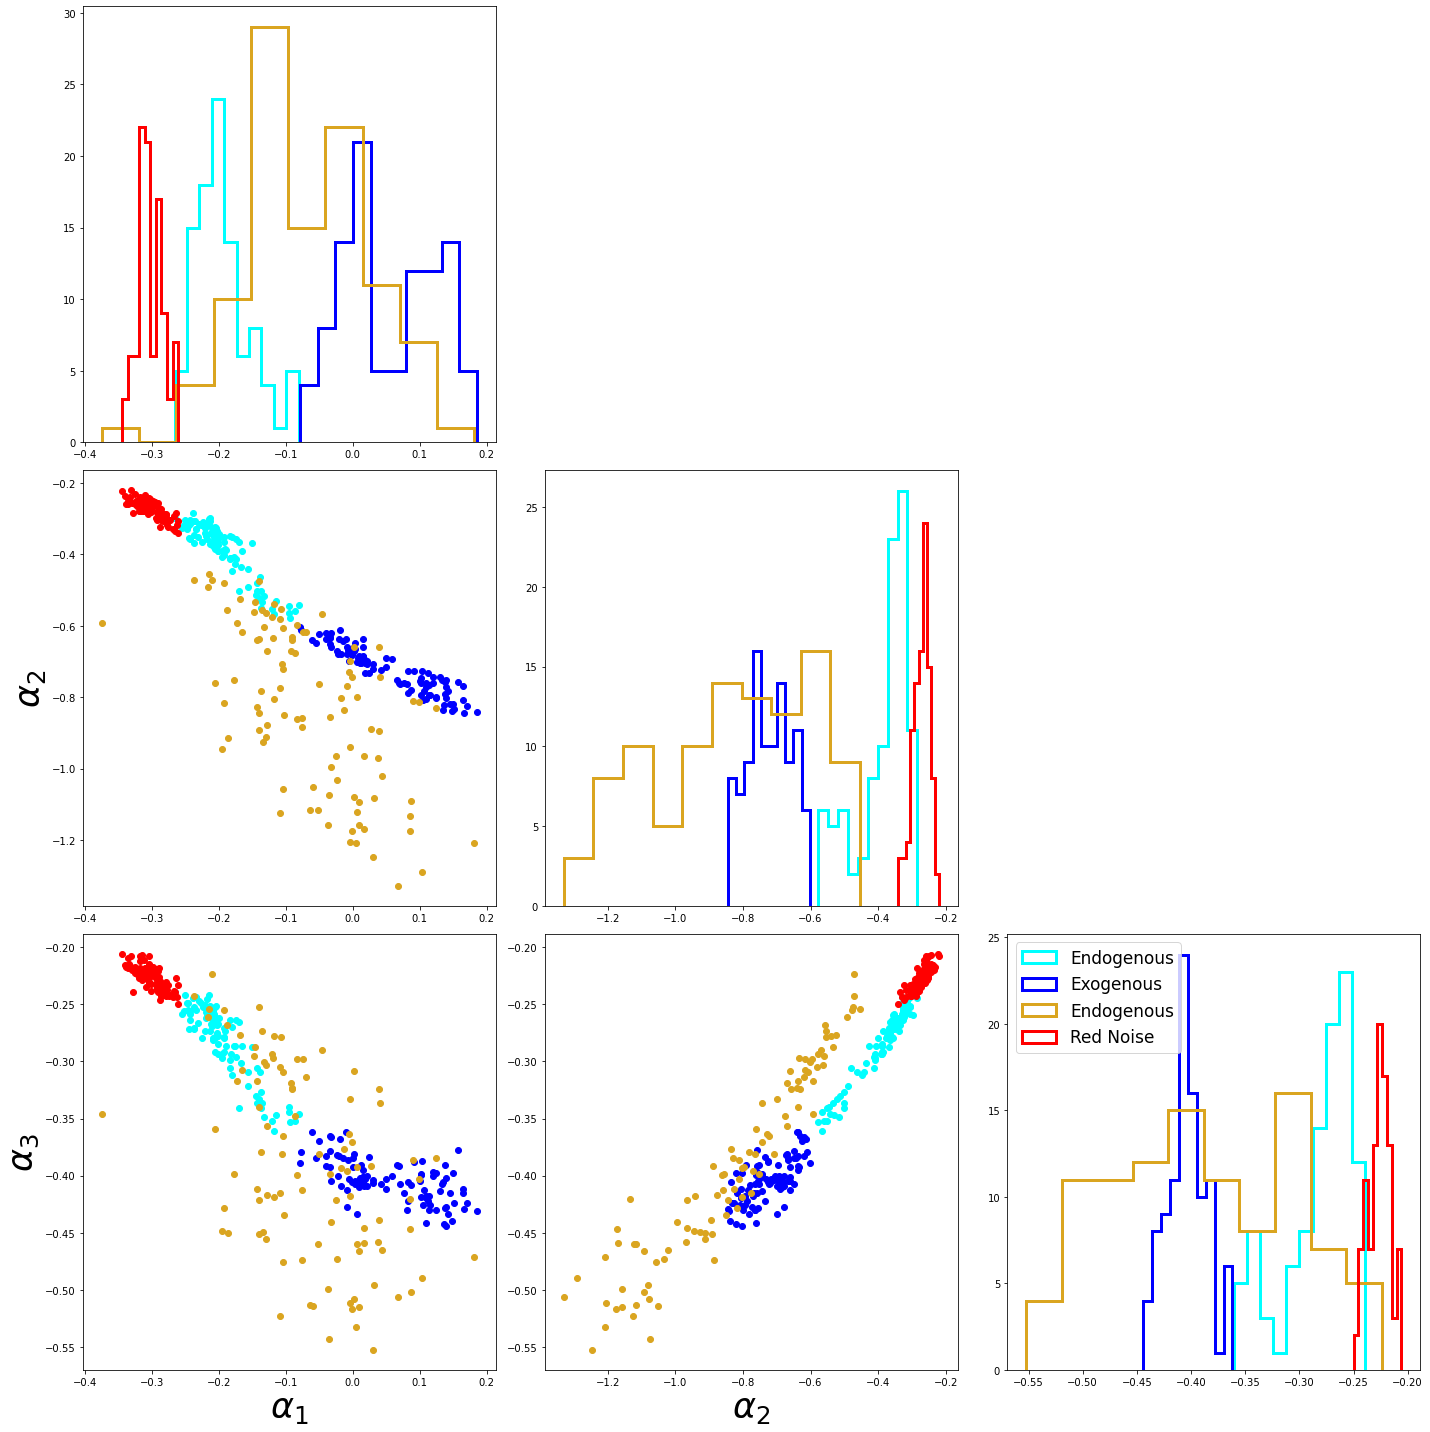

In [57]:
plt.figure(figsize=(20,20))
for i in range(3):
    for j in range(3):
        if i<j:
            plt.subplot(3,3,i+3*j+1)
            plt.scatter(endo[f"G{i+1}"],endo[f"G{j+1}"],color='cyan',label='Endogenous')
            plt.scatter(exo[f"G{i+1}"],exo[f"G{j+1}"],color='blue',label='Exogenous')
            plt.scatter(lor[f"G{i+1}"],lor[f"G{j+1}"],color='goldenrod',label='Endogenous')
            plt.scatter(rn[f"G{i+1}"],rn[f"G{j+1}"],color='red',label='Red Noise')
            #plt.scatter(wn["G1"],wn["G2"],color='black')
            if j==2:
                plt.xlabel(fr"$\alpha_{i+1}$",fontsize=35)
            if i==0:
                plt.ylabel(fr"$\alpha_{j+1}$",fontsize=35)
        if i==j:
            plt.subplot(3,3,i+3*j+1)
            plt.hist(endo[f"G{i+1}"],color='cyan',label='Endogenous',histtype='step',lw=3)
            plt.hist(exo[f"G{i+1}"],color='blue',label='Exogenous',histtype='step',lw=3)
            plt.hist(lor[f"G{i+1}"],color='goldenrod',label='Endogenous',histtype='step',lw=3)
            plt.hist(rn[f"G{i+1}"],color='red',label='Red Noise',histtype='step',lw=3)
            #plt.scatter(wn["G1"],wn["G2"],color='black')
            #plt.title(fr"$\alpha_{j+1}$",fontsize=25)
plt.legend(fontsize=17)
plt.tight_layout()

plt.show()

In [62]:
endo['G2']

0    -0.316997
1    -0.401799
2    -0.391499
3    -0.531187
4    -0.306875
        ...   
95   -0.550346
96   -0.480873
97   -0.327139
98   -0.389042
99   -0.502277
Name: G2, Length: 100, dtype: float64

In [46]:
endo.to_csv("endo_Hilbert_3_17_2.csv", index=False)
exo.to_csv("exo_Hilbert_3_17_2.csv", index=False)
lor.to_csv("lor_Hilbert_3_17_2.csv", index=False)
rn.to_csv("rn_Hilbert_3_17_2.csv", index=False)

In [10]:
endo = pd.read_csv("endo_Hilbert_3_17_2.csv")
exo = pd.read_csv("exo_Hilbert_3_17_2.csv")
lor = pd.read_csv("lor_Hilbert_3_17_2.csv")
rn = pd.read_csv("rn_Hilbert_3_17_2.csv")

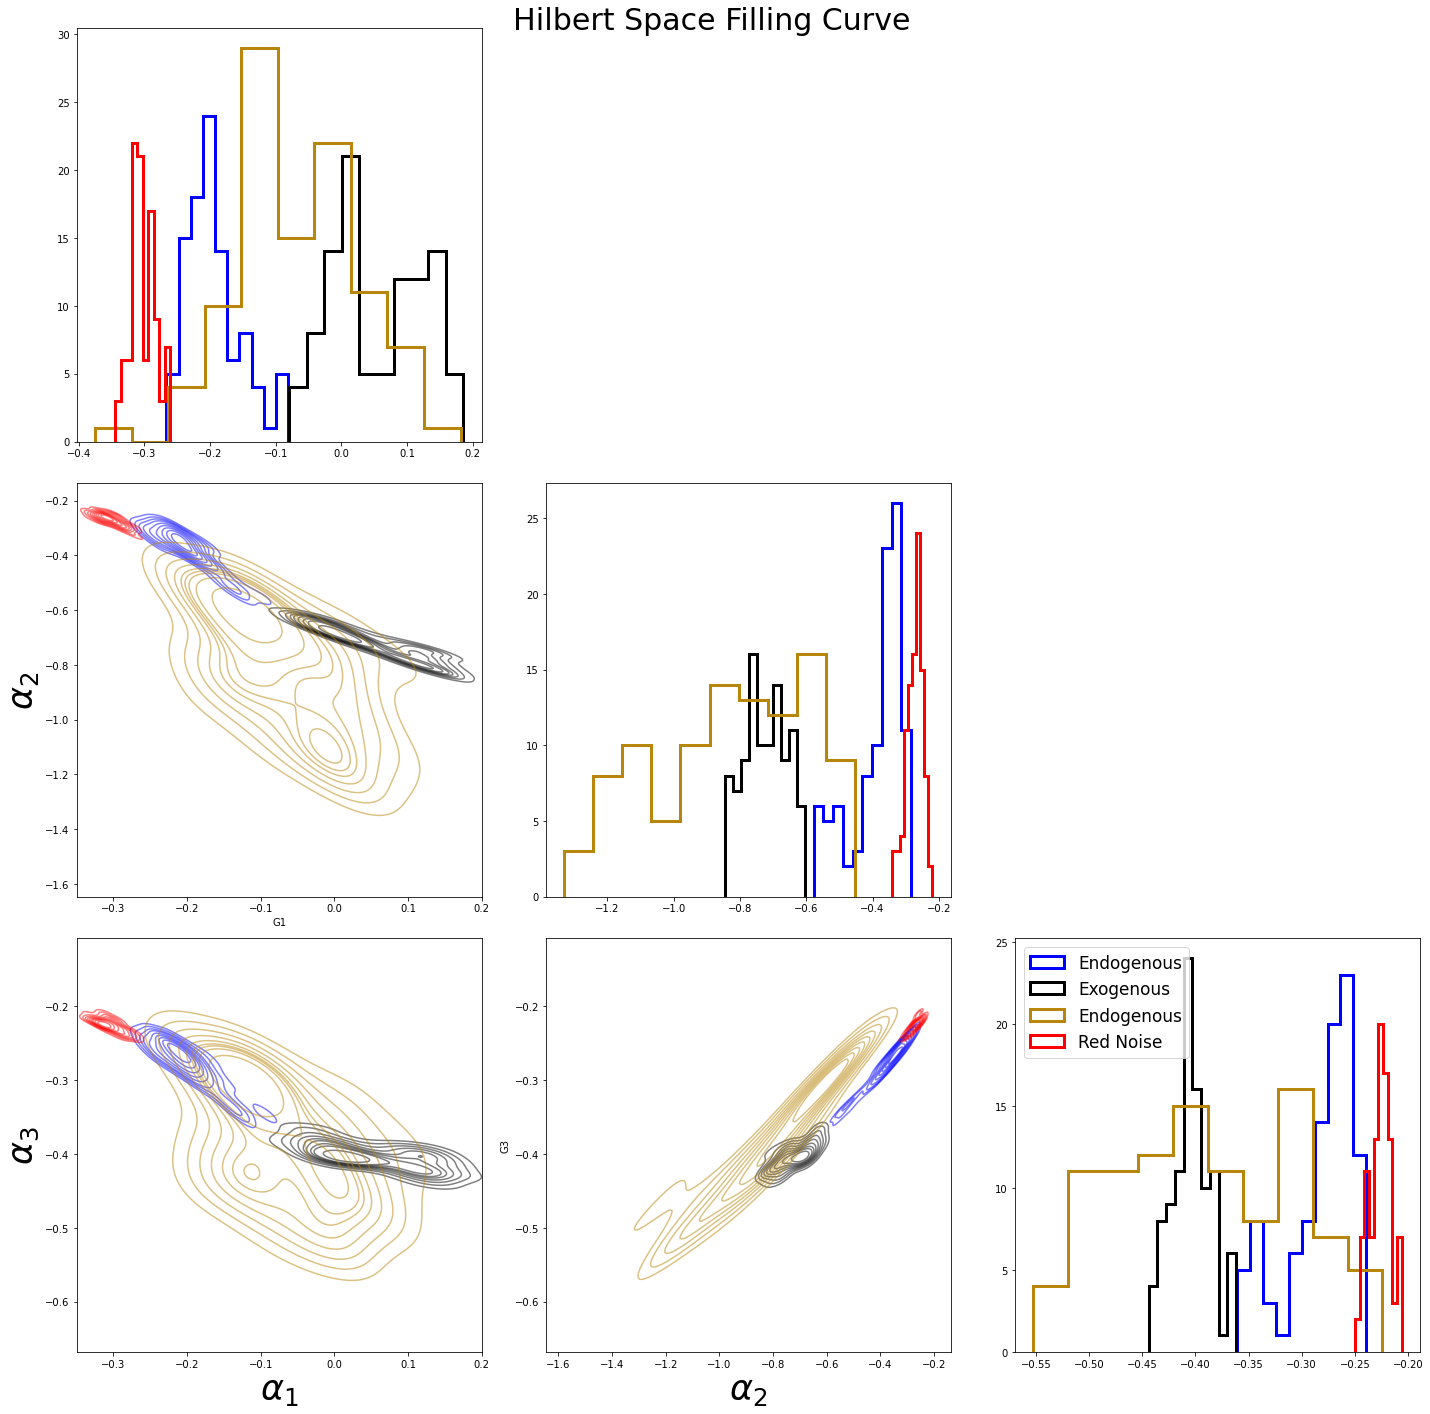

In [17]:
plt.figure(figsize=(20,20))
for i in range(3):
    for j in range(3):
        if ((i==2) and (j==0)):
            plt.legend()
        if i<j:
            plt.subplot(3,3,i+3*j+1)
            sns.kdeplot(data=endo, x=f"G{i+1}", y=f"G{j+1}",fill=False,color='blue',thresh=0.15,alpha = 0.5)
            sns.kdeplot(data=exo, x=f"G{i+1}", y=f"G{j+1}",fill=False,color='black',thresh=0.15,alpha = 0.5)
            sns.kdeplot(data=lor, x=f"G{i+1}", y=f"G{j+1}",fill=False,color='darkgoldenrod',thresh=0.15,alpha = 0.5)
            sns.kdeplot(data=rn, x=f"G{i+1}", y=f"G{j+1}",fill=False,color='red',thresh=0.15,alpha = 0.5)
            plt.title('')
            if j==2:
                plt.xlabel(fr"$\alpha_{i+1}$",fontsize=35)
            if i==0:
                plt.ylabel(fr"$\alpha_{j+1}$",fontsize=35)
                plt.xlim(-0.35,0.2)
        if i==j:
            plt.subplot(3,3,i+3*j+1)
            plt.hist(endo[f"G{i+1}"],color='blue',label='Endogenous',histtype='step',lw=3)
            plt.hist(exo[f"G{i+1}"],color='black',label='Exogenous',histtype='step',lw=3)
            plt.hist(lor[f"G{i+1}"],color='darkgoldenrod',label='Endogenous',histtype='step',lw=3)
            plt.hist(rn[f"G{i+1}"],color='red',label='Red Noise',histtype='step',lw=3)
            #plt.scatter(wn["G1"],wn["G2"],color='black')
            #plt.title(fr"$\alpha_{j+1}$",fontsize=25)
plt.legend(fontsize=17)
plt.suptitle("Hilbert Space Filling Curve ",fontsize=30)
plt.tight_layout()

plt.show()

# Tradicional

100%|█████████████████████████████████████████| 100/100 [07:31<00:00,  4.52s/it]


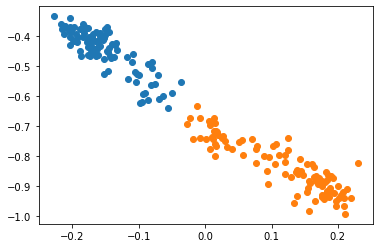

In [2]:
endo,exo = [] , []
for i in tqdm.tqdm(range(100)):
    series, _, _ = chi.generateUniformEndo(4096)
    g1 = GPA1D.scalingLaw(series,"G1",spaceFilling='lines')
    g2 = GPA1D.scalingLaw(series,"G2",spaceFilling='lines')
    g3 = GPA1D.scalingLaw(series,"G3",spaceFilling='lines')
    endo.append({"G1":g1,"G2":g2,"G3":g3})
    
    series, _, _ = chi.generateUniformExo(4096)
    g1 = GPA1D.scalingLaw(series,"G1",spaceFilling='lines')
    g2 = GPA1D.scalingLaw(series,"G2",spaceFilling='lines')
    g3 = GPA1D.scalingLaw(series,"G3",spaceFilling='lines')
    exo.append({"G1":g1,"G2":g2,"G3":g3})

endo,exo = pd.DataFrame(endo),pd.DataFrame(exo)
plt.figure()
plt.scatter(endo["G1"],endo["G2"])
plt.scatter(exo["G1"],exo["G2"])
plt.show()

100%|█████████████████████████████████████████| 100/100 [02:06<00:00,  1.26s/it]


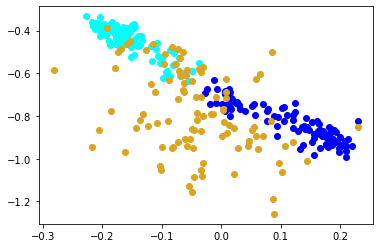

In [3]:
lor = []
for i in tqdm.tqdm(range(100)):
    mu = 2 + 4*np.random.rand()
    t, r= chi.lorenzSynch(mu=mu, n=2**10+100)
    g1 = GPA1D.scalingLaw(r,"G1",spaceFilling='lines')
    g2 = GPA1D.scalingLaw(r,"G2",spaceFilling='lines')
    g3 = GPA1D.scalingLaw(r,"G3",spaceFilling='lines')
    lor.append({"G1":g1,"G2":g2,"G3":g3})
lor = pd.DataFrame(lor)
plt.figure()
plt.scatter(endo["G1"],endo["G2"],color='cyan')
plt.scatter(exo["G1"],exo["G2"],color='blue')
plt.scatter(lor["G1"],lor["G2"],color='goldenrod')
plt.show()

100%|█████████████████████████████████████████| 100/100 [19:30<00:00, 11.71s/it]


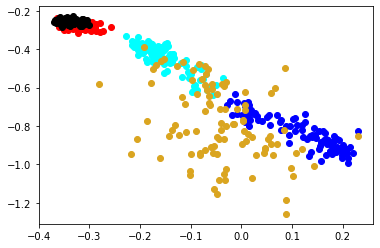

In [5]:
rn,wn = [],[]
for i in tqdm.tqdm(range(100)):
    r = chi.cNoise(2,[2**13])
    g1 = GPA1D.scalingLaw(r,"G1",spaceFilling='lines')
    g2 = GPA1D.scalingLaw(r,"G2",spaceFilling='lines')
    g3 = GPA1D.scalingLaw(r,"G3",spaceFilling='lines')
    rn.append({"G1":g1,"G2":g2,"G3":g3})
    
    w = chi.cNoise(0,[2**13])
    g1 = GPA1D.scalingLaw(w,"G1",spaceFilling='lines')
    g2 = GPA1D.scalingLaw(w,"G2",spaceFilling='lines')
    g3 = GPA1D.scalingLaw(w,"G3",spaceFilling='lines')
    wn.append({"G1":g1,"G2":g2,"G3":g3})

rn = pd.DataFrame(rn)
wn = pd.DataFrame(wn)

plt.figure()
plt.scatter(endo["G1"],endo["G2"],color='cyan')
plt.scatter(exo["G1"],exo["G2"],color='blue')
plt.scatter(lor["G1"],lor["G2"],color='goldenrod')
plt.scatter(rn["G1"],rn["G2"],color='red')
plt.scatter(wn["G1"],wn["G2"],color='black')
plt.show()

In [6]:
endo.to_csv("endo_s_3_17_2.csv", index=False)
exo.to_csv("exo_s_3_17_2.csv", index=False)
lor.to_csv("lor_s_3_17_2.csv", index=False)
rn.to_csv("rn_s_3_17_2.csv", index=False)

In [19]:
endo = pd.read_csv("endo_s_3_17_2.csv")
exo = pd.read_csv("exo_s_3_17_2.csv")
lor = pd.read_csv("lor_s_3_17_2.csv")
rn = pd.read_csv("rn_s_3_17_2.csv")

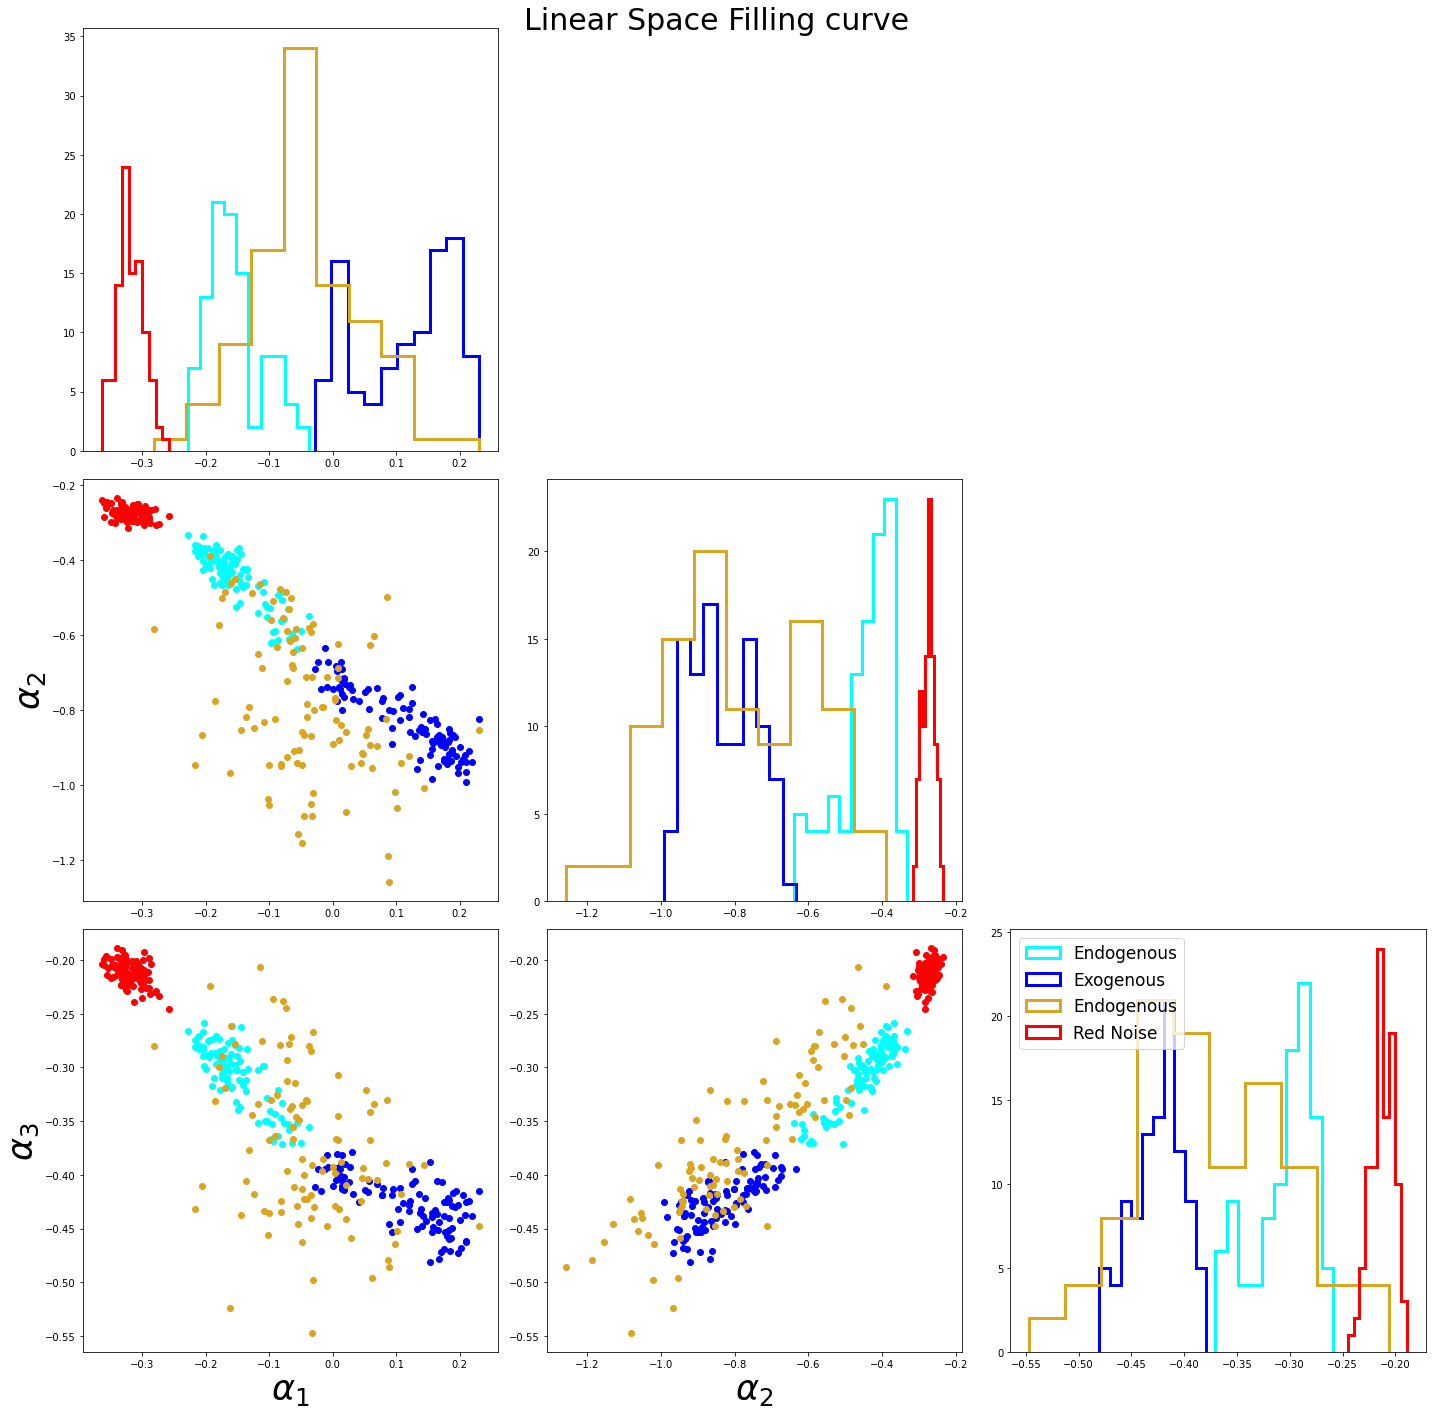

In [20]:
plt.figure(figsize=(20,20))
for i in range(3):
    for j in range(3):
        if i<j:
            plt.subplot(3,3,i+3*j+1)
            plt.scatter(endo[f"G{i+1}"],endo[f"G{j+1}"],color='cyan',label='Endogenous')
            plt.scatter(exo[f"G{i+1}"],exo[f"G{j+1}"],color='blue',label='Exogenous')
            plt.scatter(lor[f"G{i+1}"],lor[f"G{j+1}"],color='goldenrod',label='Endogenous')
            plt.scatter(rn[f"G{i+1}"],rn[f"G{j+1}"],color='red',label='Red Noise')
            #plt.scatter(wn["G1"],wn["G2"],color='black')
            if j==2:
                plt.xlabel(fr"$\alpha_{i+1}$",fontsize=35)
            if i==0:
                plt.ylabel(fr"$\alpha_{j+1}$",fontsize=35)
        if i==j:
            plt.subplot(3,3,i+3*j+1)
            plt.hist(endo[f"G{i+1}"],color='cyan',label='Endogenous',histtype='step',lw=3)
            plt.hist(exo[f"G{i+1}"],color='blue',label='Exogenous',histtype='step',lw=3)
            plt.hist(lor[f"G{i+1}"],color='goldenrod',label='Endogenous',histtype='step',lw=3)
            plt.hist(rn[f"G{i+1}"],color='red',label='Red Noise',histtype='step',lw=3)
            #plt.scatter(wn["G1"],wn["G2"],color='black')
            #plt.title(fr"$\alpha_{j+1}$",fontsize=25)
plt.legend(fontsize=17)
plt.suptitle("Linear Space Filling curve",fontsize=30)
plt.tight_layout()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


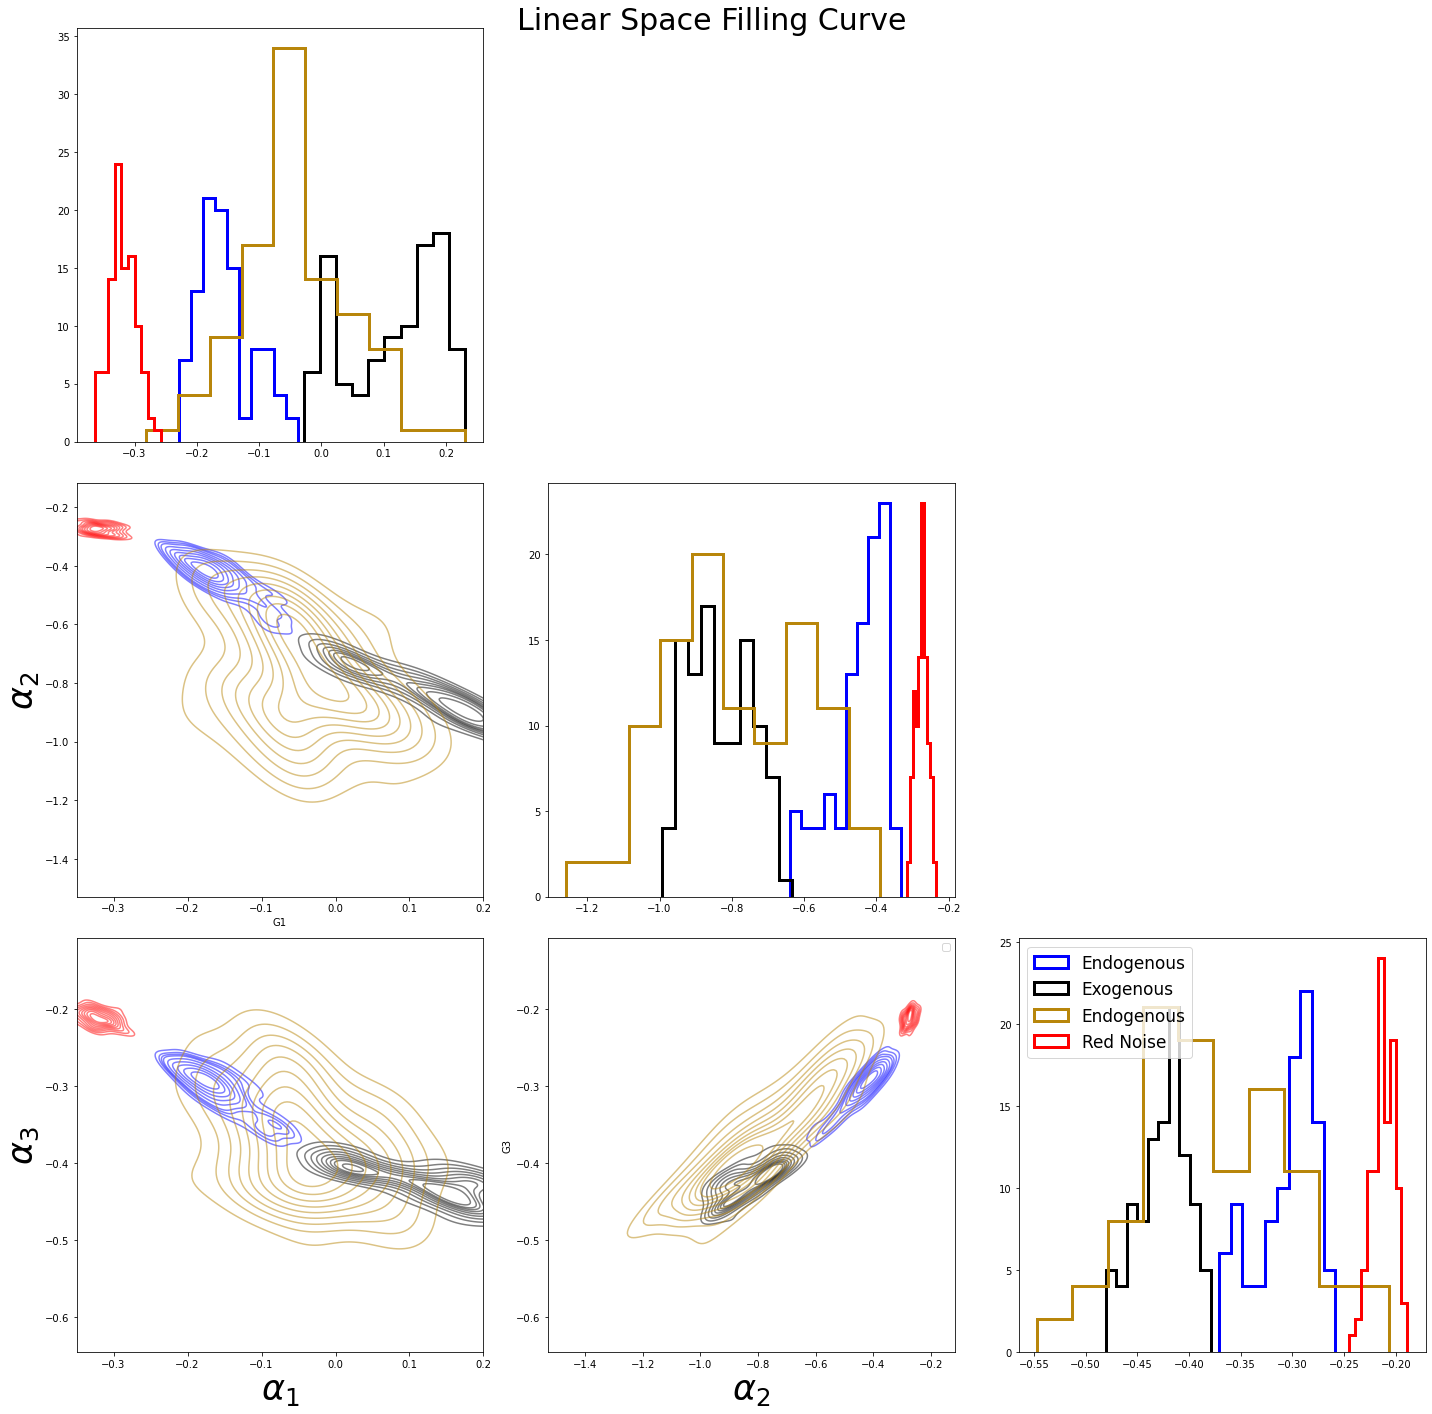

In [21]:
plt.figure(figsize=(20,20))
for i in range(3):
    for j in range(3):
        if ((i==2) and (j==0)):
            plt.legend()
        if i<j:
            plt.subplot(3,3,i+3*j+1)
            sns.kdeplot(data=endo, x=f"G{i+1}", y=f"G{j+1}",fill=False,color='blue',thresh=0.15,alpha = 0.5)
            sns.kdeplot(data=exo, x=f"G{i+1}", y=f"G{j+1}",fill=False,color='black',thresh=0.15,alpha = 0.5)
            sns.kdeplot(data=lor, x=f"G{i+1}", y=f"G{j+1}",fill=False,color='darkgoldenrod',thresh=0.15,alpha = 0.5)
            sns.kdeplot(data=rn, x=f"G{i+1}", y=f"G{j+1}",fill=False,color='red',thresh=0.15,alpha = 0.5)
            plt.title('')
            if j==2:
                plt.xlabel(fr"$\alpha_{i+1}$",fontsize=35)
            if i==0:
                plt.ylabel(fr"$\alpha_{j+1}$",fontsize=35)
                plt.xlim(-0.35,0.2)
        if i==j:
            plt.subplot(3,3,i+3*j+1)
            plt.hist(endo[f"G{i+1}"],color='blue',label='Endogenous',histtype='step',lw=3)
            plt.hist(exo[f"G{i+1}"],color='black',label='Exogenous',histtype='step',lw=3)
            plt.hist(lor[f"G{i+1}"],color='darkgoldenrod',label='Endogenous',histtype='step',lw=3)
            plt.hist(rn[f"G{i+1}"],color='red',label='Red Noise',histtype='step',lw=3)
            #plt.scatter(wn["G1"],wn["G2"],color='black')
            #plt.title(fr"$\alpha_{j+1}$",fontsize=25)
plt.legend(fontsize=17)
plt.suptitle("Linear Space Filling Curve ",fontsize=30)
plt.tight_layout()

plt.show()